### Importação dos dados



In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



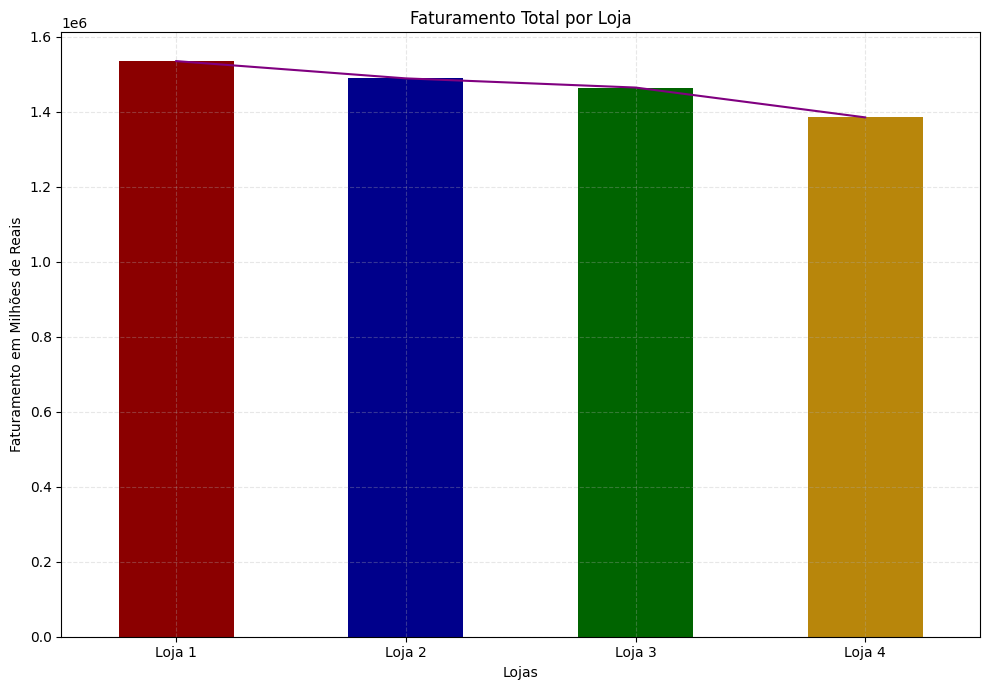

In [38]:
faturamentos = pd.DataFrame()

faturamentos['Loja 1'] = loja['Preço']
faturamentos['Loja 2'] = loja2['Preço']
faturamentos['Loja 3'] = loja3['Preço']
faturamentos['Loja 4'] = loja4['Preço']
cores = ['#8b0000', '#00008b', '#006400', '#b8860b']
lojas_nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

faturamentos.fillna(0)
faturamentos.sum().plot(kind="bar", figsize=(10, 7), color=cores, title='Faturamento Total por Loja', xlabel = "Lojas", ylabel="Faturamento em Milhões de Reais")
faturamentos.sum().plot(kind='line', figsize=(10,7), color='purple')
plt.grid(linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [39]:
faturamento_total = faturamentos.sum().sum()
for i in range(faturamentos.shape[1]):
  print(f"Faturamento {lojas_nomes[i]}: R${faturamentos.sum().iloc[i]}, {100 * faturamentos.sum().iloc[i]/faturamento_total:.2f}% do faturamento total.")

Faturamento Loja 1: R$1534509.12, 26.13% do faturamento total.
Faturamento Loja 2: R$1488459.06, 25.35% do faturamento total.
Faturamento Loja 3: R$1464025.03, 24.93% do faturamento total.
Faturamento Loja 4: R$1384497.58, 23.58% do faturamento total.


# 2. Vendas por Categoria

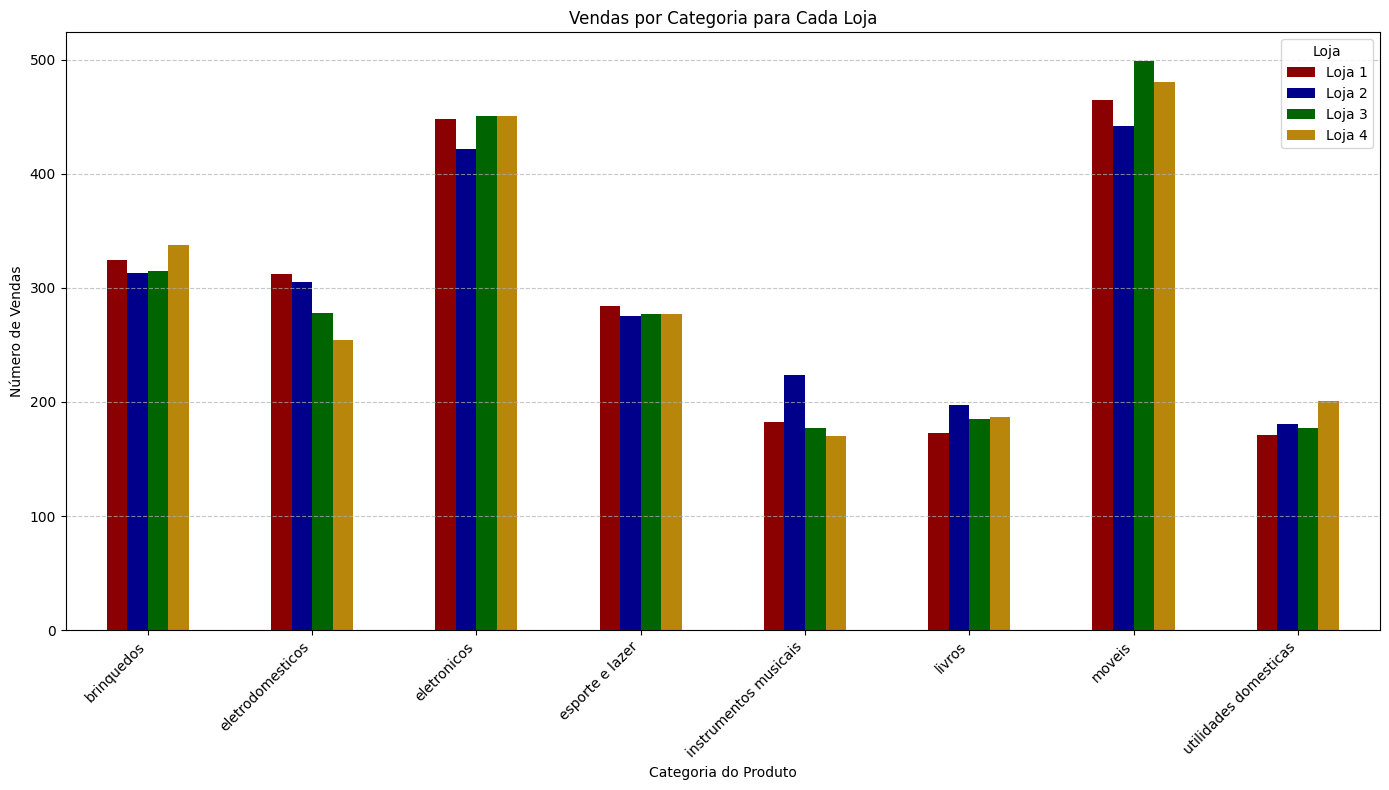

In [40]:
# Gráficos mostrando a situação de cada lojas em vendas por categorias

import pandas as pd
import matplotlib.pyplot as plt

# Lista de DataFrame
lojas_categorias_count = []
lojas_df = [loja, loja2, loja3, loja4]
lojas_nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

for df, name in zip(lojas_df, lojas_nomes):
    category_counts = df['Categoria do Produto'].value_counts().to_frame(name=name).sort_index()
    lojas_categorias_count.append(category_counts)

# Todas a categorias em um único data frame
df_categorias_todas_lojas = pd.concat(lojas_categorias_count, axis=1).fillna(0)

# Tratamento de erros
df_categorias_todas_lojas = df_categorias_todas_lojas.astype(int)

# Plot
df_categorias_todas_lojas.plot(kind='bar', figsize=(14, 8), color=cores)
plt.title('Vendas por Categoria para Cada Loja')
plt.xlabel('Categoria do Produto')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loja')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [41]:
# Uma adição para verificar qual Loja foi a que vendeu mais e a que vendeu menos em cada categoria
df_categorias_todas_lojas_avaliacao = df_categorias_todas_lojas.copy()
df_categorias_todas_lojas_avaliacao['coluna_max'] = df_categorias_todas_lojas.idxmax(axis=1)
df_categorias_todas_lojas_avaliacao['coluna_min'] = df_categorias_todas_lojas.idxmin(axis=1)
df_categorias_todas_lojas_avaliacao.head(10)

,Loja 1,Loja 2,Loja 3,Loja 4,coluna_max,coluna_min
Categoria do Produto,,,,,,
brinquedos,324,313,315,338,Loja 4,Loja 2
eletrodomesticos,312,305,278,254,Loja 1,Loja 4
eletronicos,448,422,451,451,Loja 3,Loja 2
esporte e lazer,284,275,277,277,Loja 1,Loja 2
instrumentos musicais,182,224,177,170,Loja 2,Loja 4
livros,173,197,185,187,Loja 2,Loja 1
moveis,465,442,499,480,Loja 3,Loja 2
utilidades domesticas,171,181,177,201,Loja 4,Loja 1


# 3. Média de Avaliação das Lojas


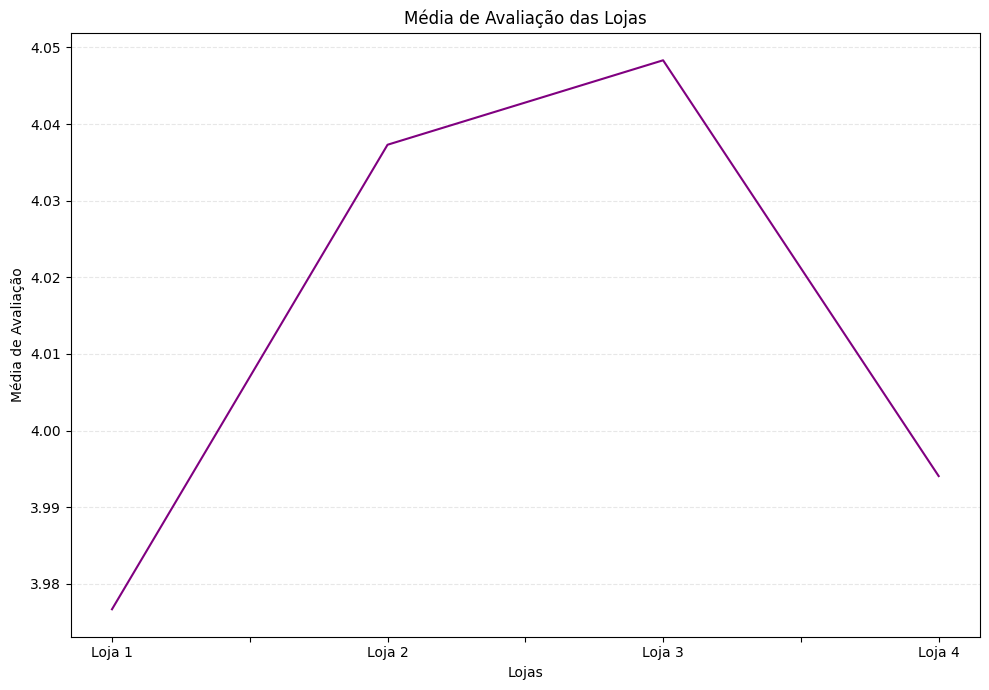

In [42]:
lojas_avaliacao_mean = pd.DataFrame()

for i, j in zip([loja, loja2, loja3, loja4], ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']):
  lojas_avaliacao_mean[j] = i['Avaliação da compra']

lojas_avaliacao_mean.fillna(0).mean().plot(kind='line', figsize=(10,7), color='purple')
plt.title('Média de Avaliação das Lojas')
plt.xlabel('Lojas')
plt.ylabel('Média de Avaliação')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [43]:
lojas_avaliacao_mean.fillna(0).mean().head()

,0
Loja 1,3.976685
Loja 2,4.037304
Loja 3,4.048326
Loja 4,3.994065


# 4. Produtos Mais e Menos Vendidos

In [44]:
for i, j in zip([loja, loja2, loja3, loja4], ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']):
    produtos_counts = i['Produto'].value_counts()

    # Produtos mais vendidos
    mais_vendidos = produtos_counts.max()
    produtos_mais = produtos_counts[produtos_counts == mais_vendidos].index.tolist()

    # Produtos menos vendidos
    menos_vendidos = produtos_counts.min()
    produtos_menos = produtos_counts[produtos_counts == menos_vendidos].index.tolist()

    print(f"{j}\nProdutos mais vendidos: {', '.join(produtos_mais)}\nProdutos menos vendidos: {', '.join(produtos_menos)}\n")

Loja 1
Produtos mais vendidos: Micro-ondas, TV Led UHD 4K, Guarda roupas
Produtos menos vendidos: Headset, Celular ABXY

Loja 2
Produtos mais vendidos: Iniciando em programação
Produtos menos vendidos: Jogo de tabuleiro

Loja 3
Produtos mais vendidos: Kit banquetas
Produtos menos vendidos: Blocos de montar

Loja 4
Produtos mais vendidos: Cama box
Produtos menos vendidos: Guitarra



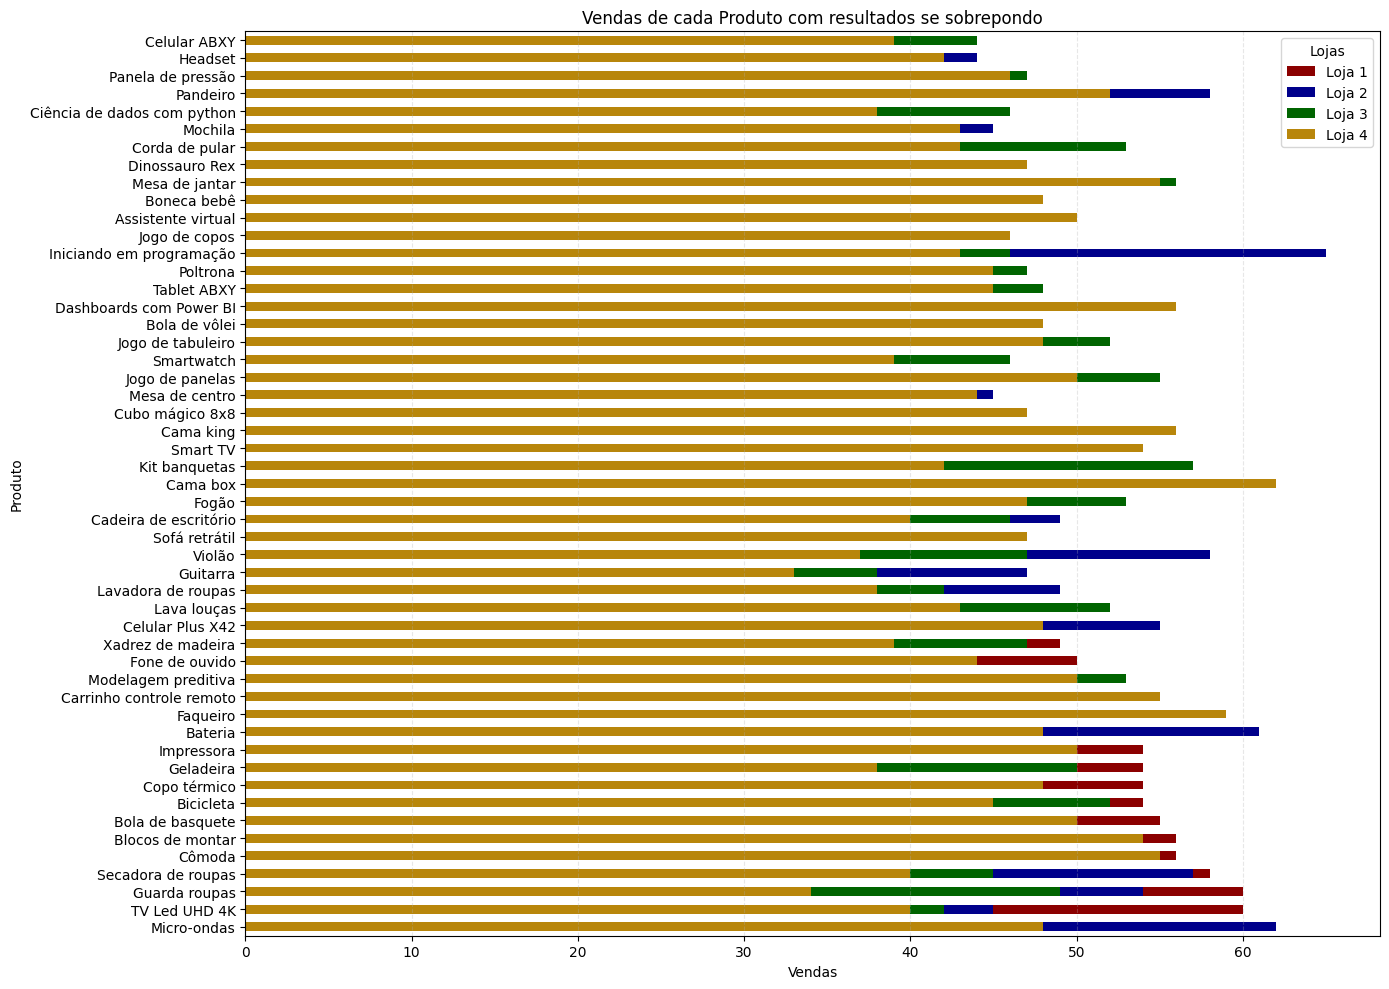

In [45]:
# Gráfico com o números de vendas de cada loja, esses dados foram reunidos em um mesmo gráfico para que possa ser possível observar qual loja se sobressai em cada categoria
df_produtos = loja.Produto.value_counts().to_frame('Loja 1')
df_produtos['Loja 2'] = loja2.Produto.value_counts()
df_produtos['Loja 3'] = loja3.Produto.value_counts()
df_produtos['Loja 4'] = loja4.Produto.value_counts()

df_produtos['Loja 1'].plot(kind='barh', figsize=(14,10), color=cores[0])
df_produtos['Loja 2'].plot(kind='barh', figsize=(14,10), color=cores[1])
df_produtos['Loja 3'].plot(kind='barh', figsize=(14,10), color=cores[2])
df_produtos['Loja 4'].plot(kind='barh', figsize=(14,10), color=cores[3])
plt.title('Vendas de cada Produto com resultados se sobrepondo')
plt.xlabel('Vendas')
plt.ylabel('Produto')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.legend(title="Lojas")
plt.tight_layout()
plt.show()

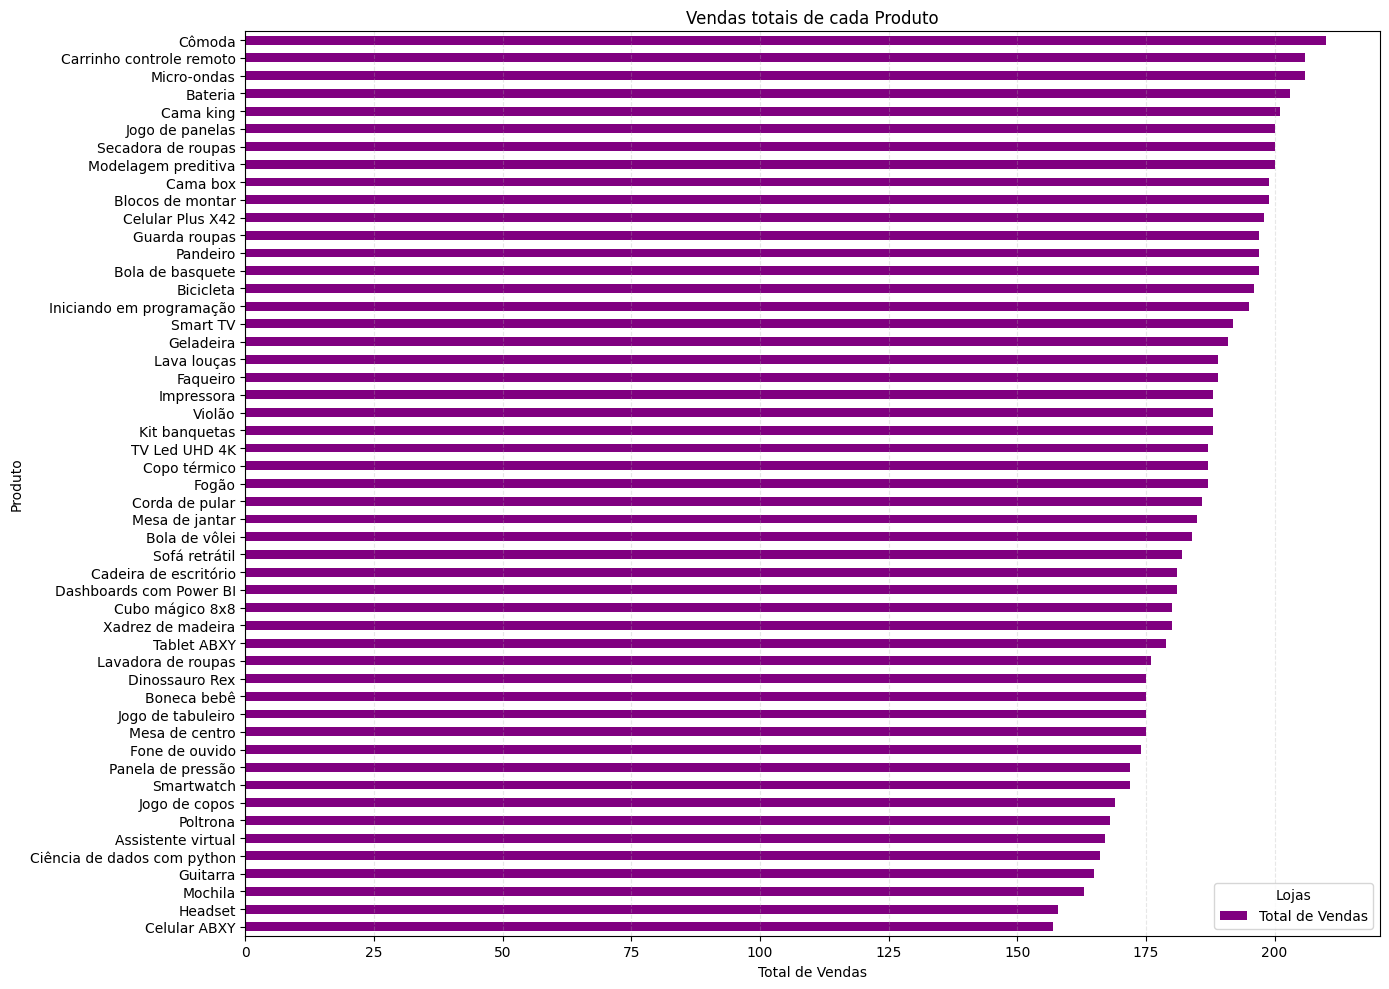

In [46]:
# Gráfico que mostra a soma de todas as vendas por produto
df_produtos_sum = df_produtos.sum(axis=1).to_frame('Total de Vendas').sort_values(by='Total de Vendas', ascending=True)
df_produtos_sum.plot(kind='barh', figsize=(14,10), color='purple')
plt.title('Vendas totais de cada Produto')
plt.xlabel('Total de Vendas')
plt.ylabel('Produto')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.legend(title="Lojas")
plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja

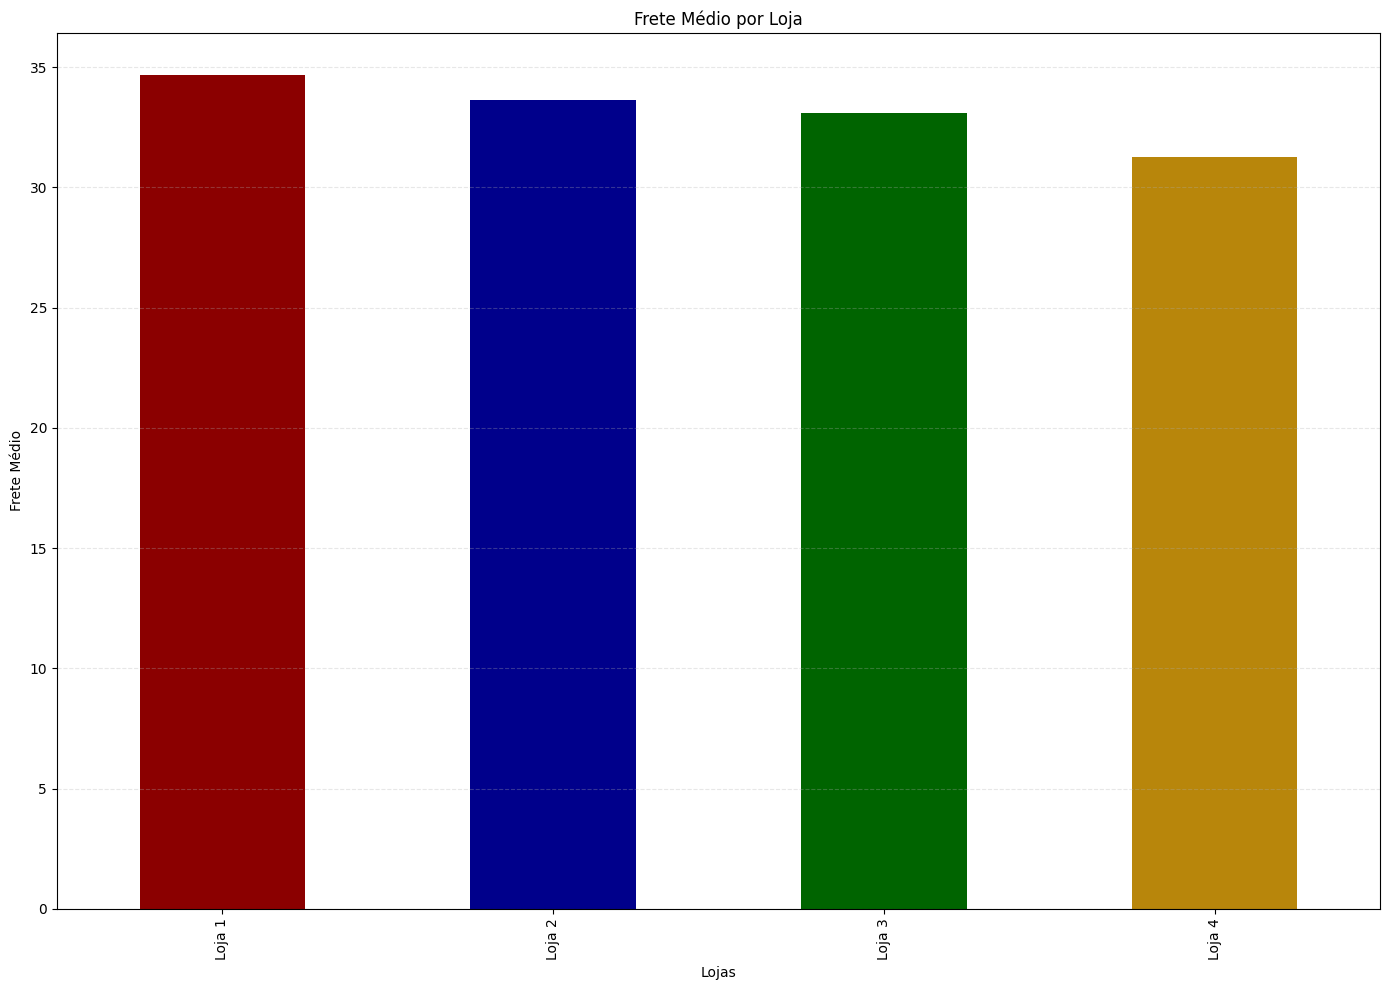

In [47]:
lojas_frete_mean = pd.DataFrame()

lojas_frete_mean['Loja 1'] = loja['Frete']
lojas_frete_mean['Loja 2'] = loja2['Frete']
lojas_frete_mean['Loja 3'] = loja3['Frete']
lojas_frete_mean['Loja 4'] = loja4['Frete']

lojas_frete_mean.fillna(0).mean().plot(kind='bar', figsize=(14,10), color=cores)
plt.title('Frete Médio por Loja')
plt.xlabel('Lojas')
plt.ylabel('Frete Médio')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [48]:
lojas_frete_mean.fillna(0).mean().head()

,0
Loja 1,34.691805
Loja 2,33.621941
Loja 3,33.074464
Loja 4,31.265738


# Avaliação de desempenho das lojas
Esta análise tem como objetivo avaliar o desempenho de 4 lojas diferentes de um mesmo dono e decidir, por meio dos dados obtidos, qual seria a melhor opção para uma venda a favor de uma melhor realocação de recursos.


## Dados obtidos
* Faturamento total de cada loja
  * Loja 1: R$1.534.509,12, 26.13% do faturamento total.

  * Loja 2: R$1.488.459,06, 25.35% do faturamento total.

  * Loja 3: R$1.464.025,03, 24.93% do faturamento total.

  * Loja 4: R$1.384.497,58, 23.58% do faturamento total.

* Avaliação Média de cada loja entre 1 a 5
  * Loja 1:	3.97.
  * Loja 2:	4.03.
  * Loja 3:	4.04.
  * Loja 4:	3.99.

* Frete Médio de cada loja
  * Loja 1:	R$34,69.

  * Loja 2:	R$33,62.

  * Loja 3:	R$33,07.

  * Loja 4:	R$31,26.

* Melhores vendas por categoria
  * Loja 1: Melhor número de vendas em 2 categorias, pior número de vendas em 2 categorias.
  * Loja 2: Melhor número de vendas em 2 categorias, pior número de vendas em 4 categorias.
  * Loja 3: Melhor número de vendas em 2 categorias, sem categorias com o pior número de vendas.
  * Loja 4: Melhor número de vendas em 2 categorias, pior número de vendas em 2 categorias

* Produtos mais e menos vendidos por loja
  * Loja 1:
      <br>Produto mais vendidos: Micro-ondas, TV Led UHD 4K, Guarda roupas<br>
      Produto menos vendidos: Headset, Celular ABXY

  * Loja 2
      <br>Produto mais vendidos: Iniciando em programação<br>
      Produtos menos vendidos: Jogo de tabuleiro

  * Loja 3
      <br>Produtos mais vendidos: Kit banquetas<br>
      Produtos menos vendidos: Blocos de montar

  * Loja 4
      <br>Produtos mais vendidos: Cama box<br>
      Produtos menos vendidos: Guitarra

## Resultado da avaliação
Com base nos dados obtidos, é recomendável a venda da Loja 4 devido ao seu desempenho, no geral, mediano nas métricas pesquisadas e, principalmente, a sua posição como a loja com o menor faturamento total.